In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('/home/abrar/Desktop/covid_19_data.csv');

In [8]:
df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [27]:
df.drop(columns=['SNo','Last Update'],axis=1,inplace=True)

In [28]:
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
df.head(20)

,Date,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
5,2020-01-22,Guangdong,Mainland China,26.0,0.0,0.0
6,2020-01-22,Guangxi,Mainland China,2.0,0.0,0.0
7,2020-01-22,Guizhou,Mainland China,1.0,0.0,0.0
8,2020-01-22,Hainan,Mainland China,4.0,0.0,0.0
9,2020-01-22,Hebei,Mainland China,1.0,0.0,0.0


In [32]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [39]:
df3 = df2.groupby(['Country','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [41]:
df3.head(20)

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,Afghanistan,2020-02-24,1.0,0.0,0.0
2,Afghanistan,2020-02-25,1.0,0.0,0.0
3,Afghanistan,2020-02-26,1.0,0.0,0.0
4,Afghanistan,2020-02-27,1.0,0.0,0.0
5,Afghanistan,2020-02-28,1.0,0.0,0.0
6,Afghanistan,2020-02-29,1.0,0.0,0.0
7,Afghanistan,2020-03-01,1.0,0.0,0.0
8,Afghanistan,2020-03-02,1.0,0.0,0.0
9,Afghanistan,2020-03-03,1.0,0.0,0.0


In [51]:
countries = df3['Country'].unique()
l = len(countries)
l

111

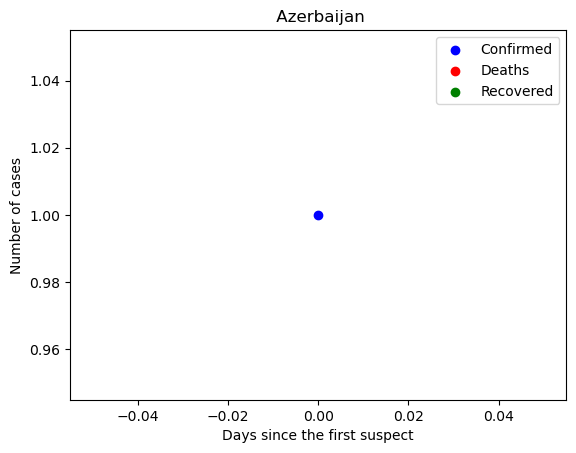

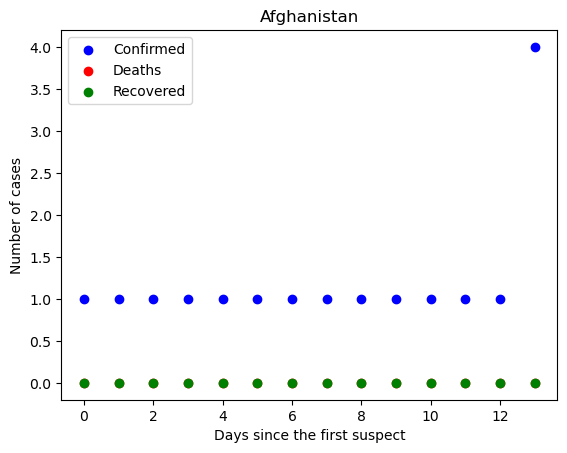

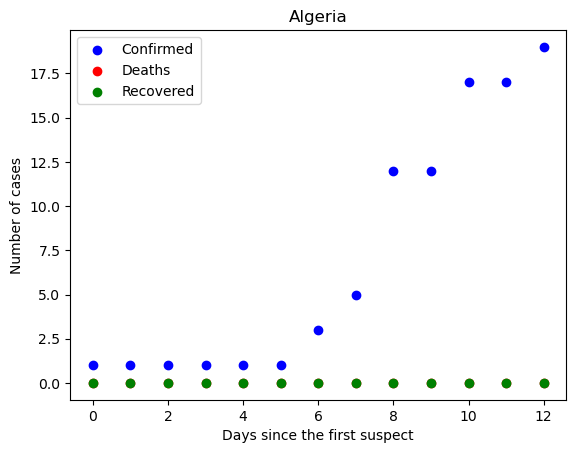

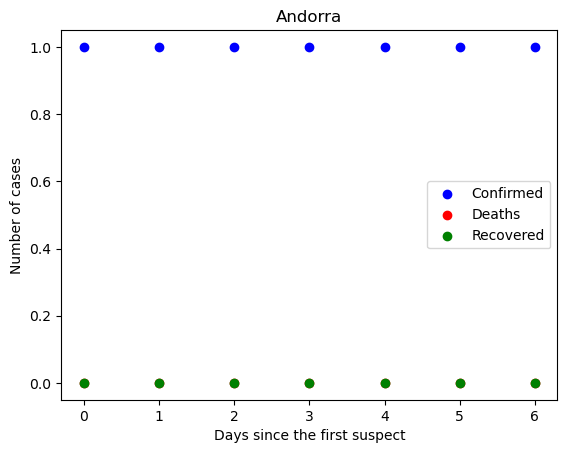

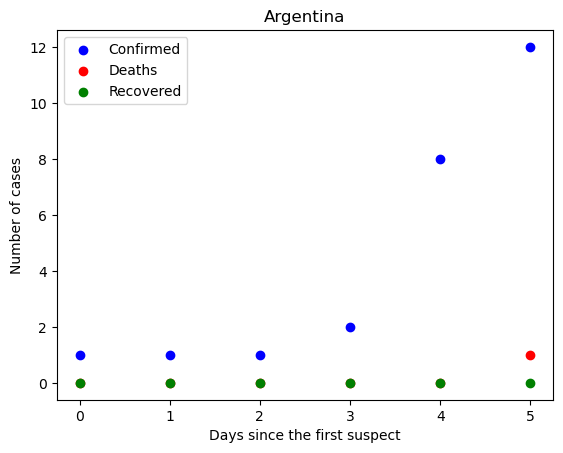

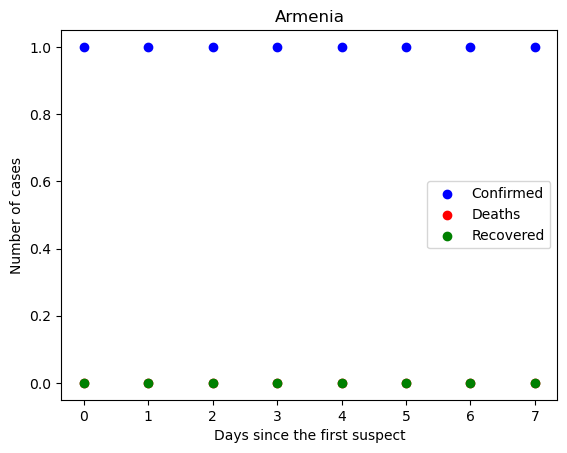

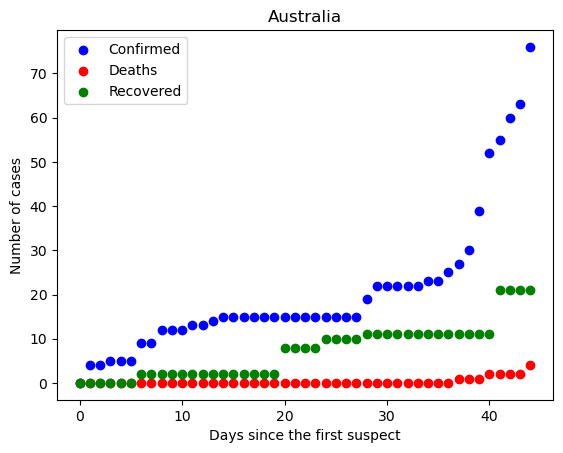

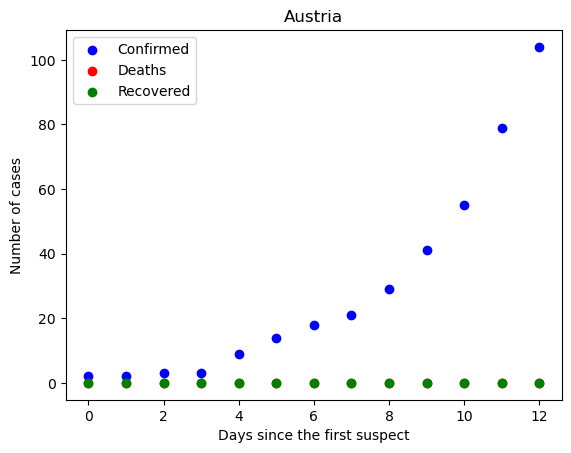

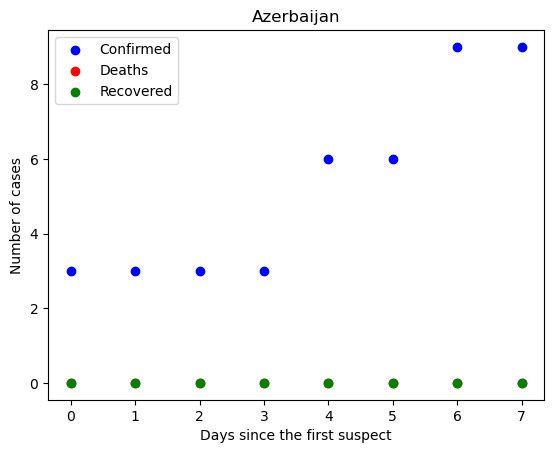

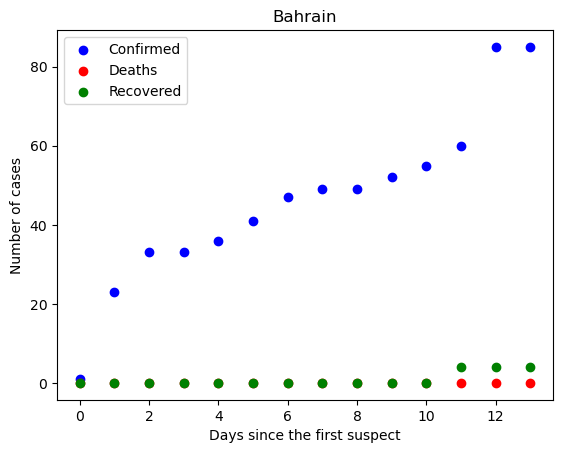

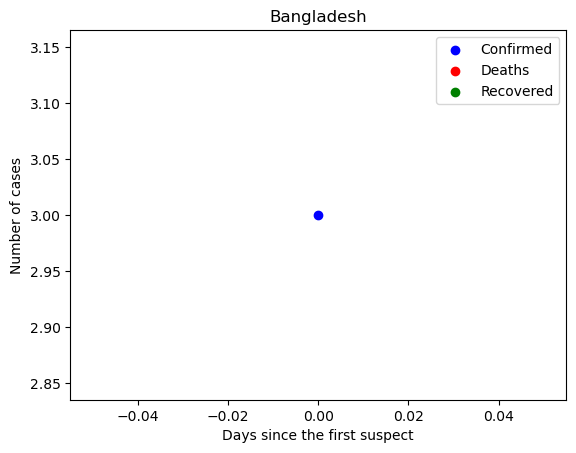

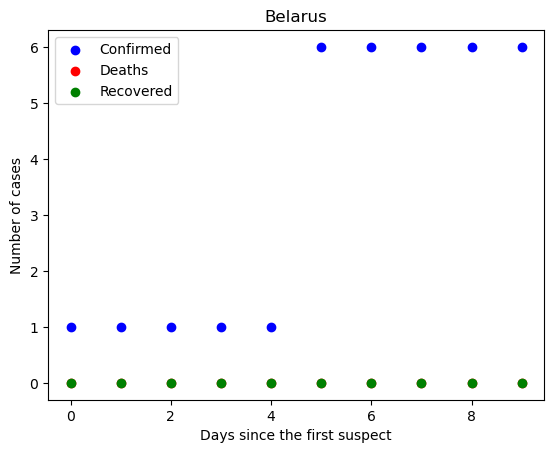

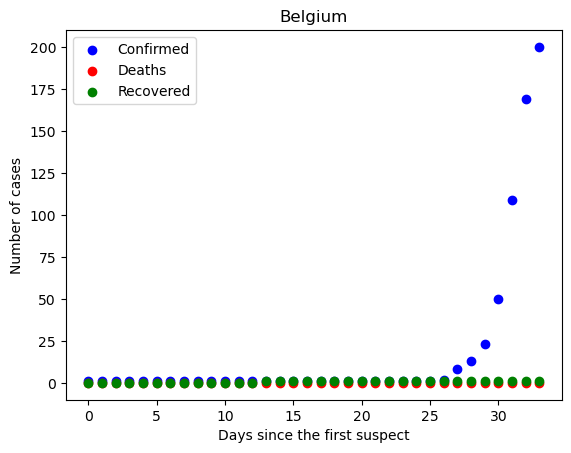

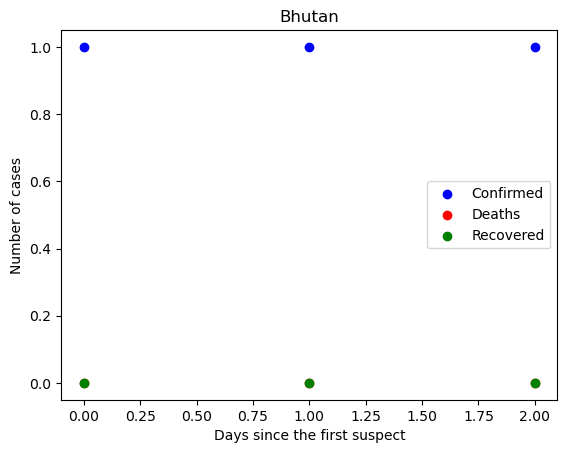

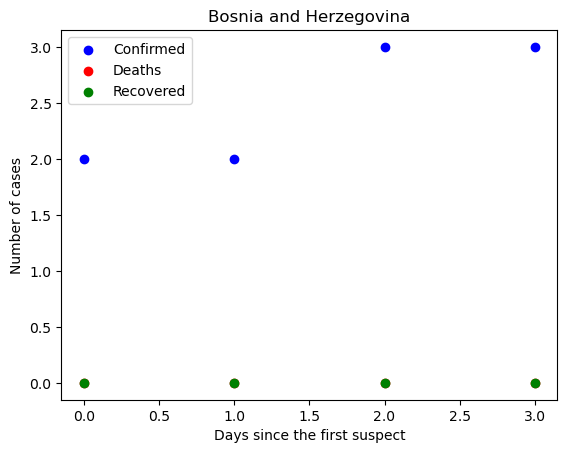

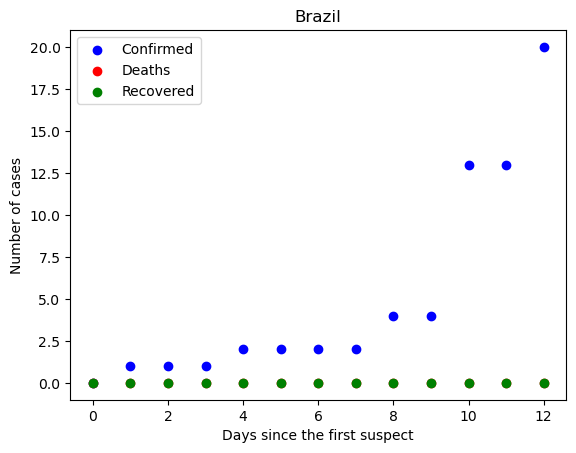

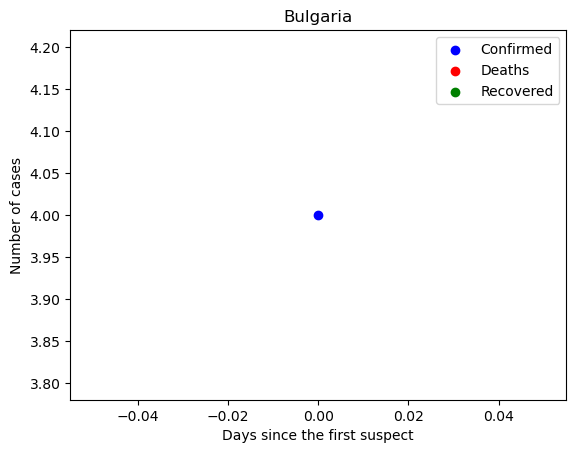

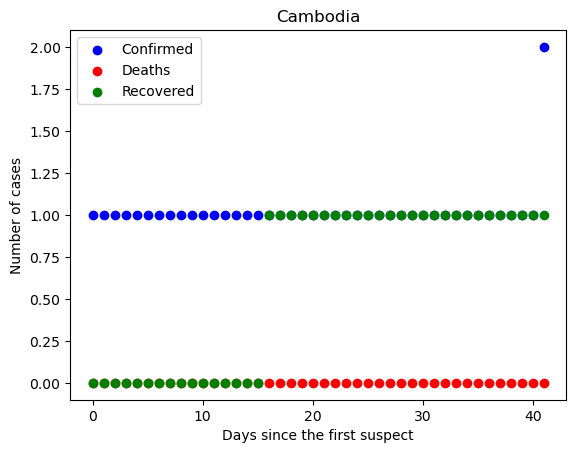

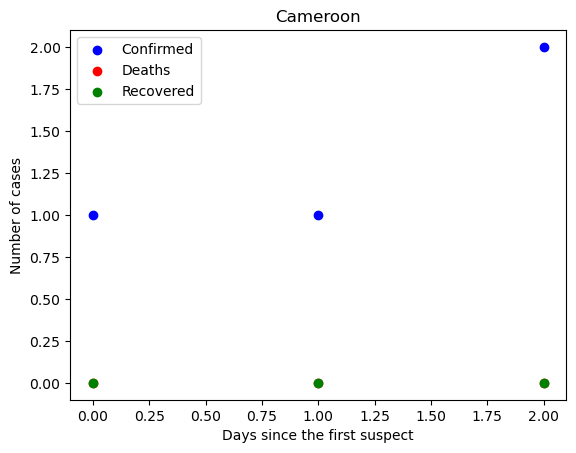

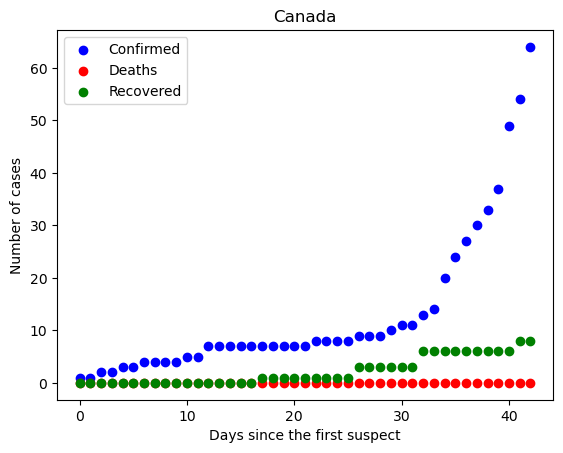

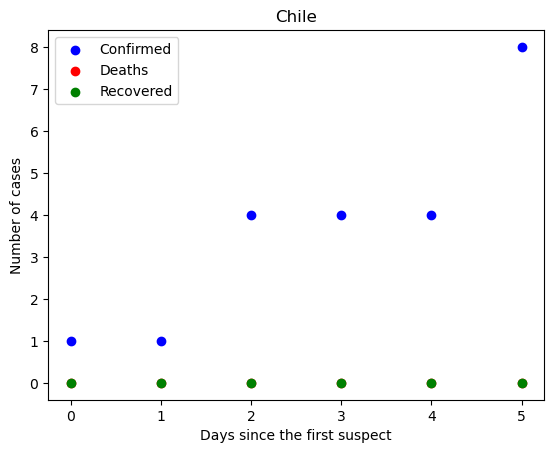

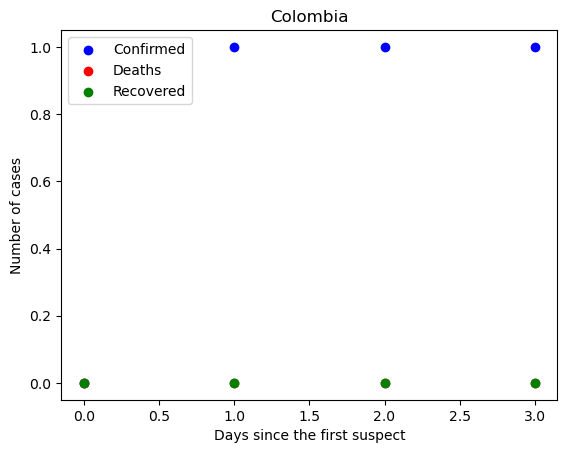

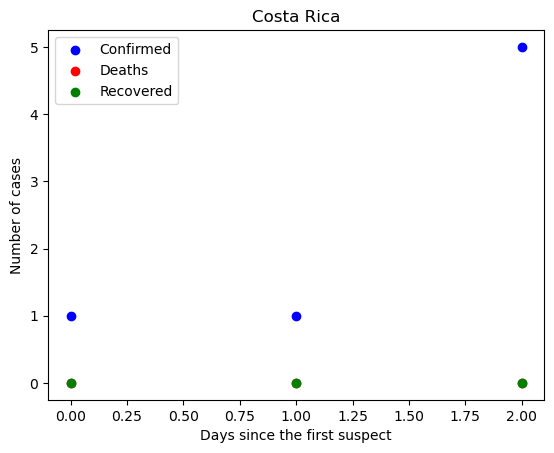

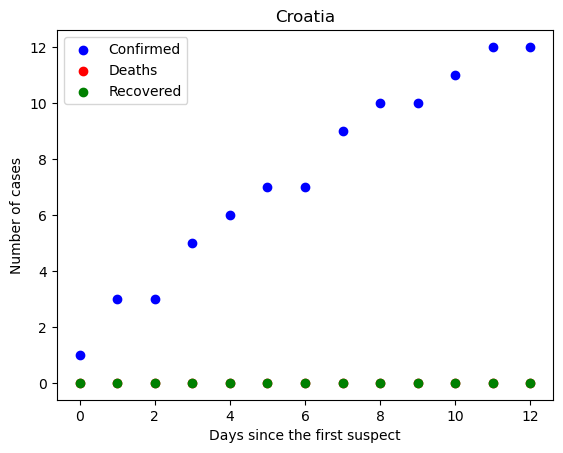

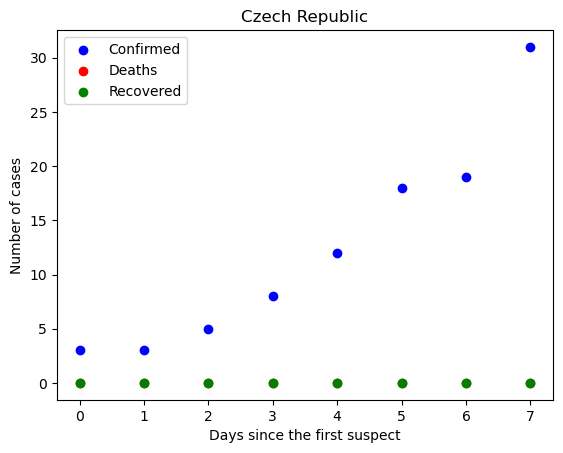

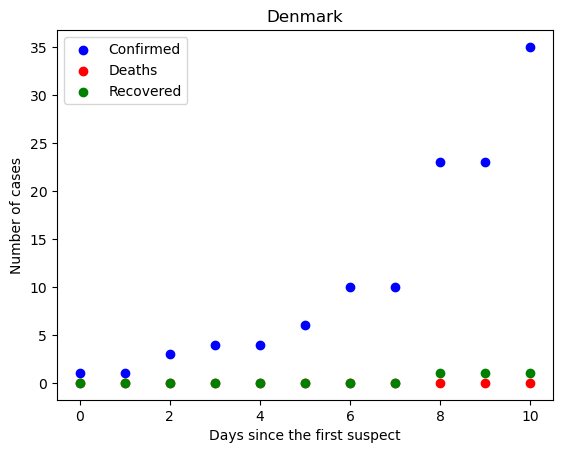

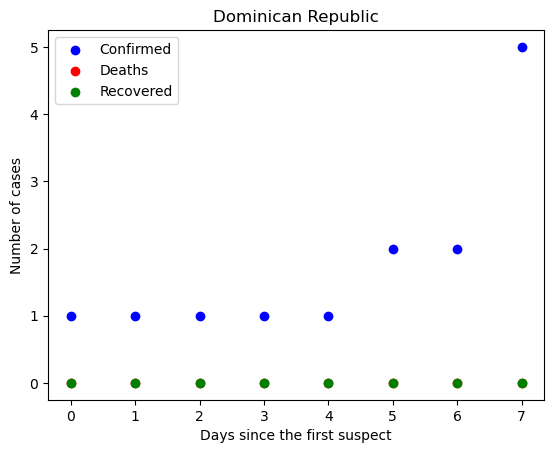

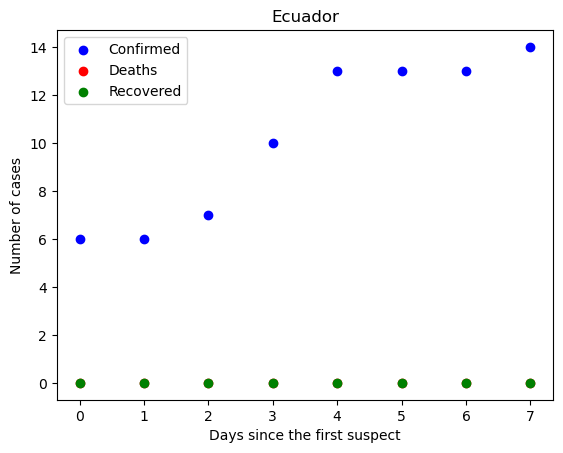

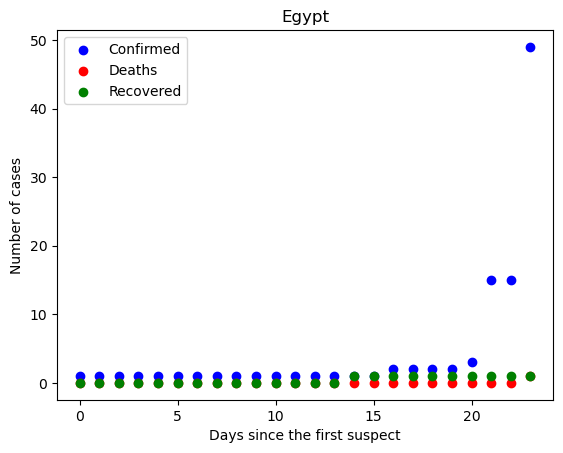

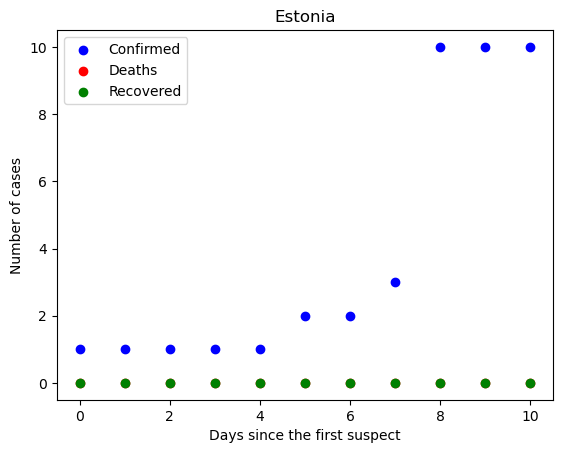

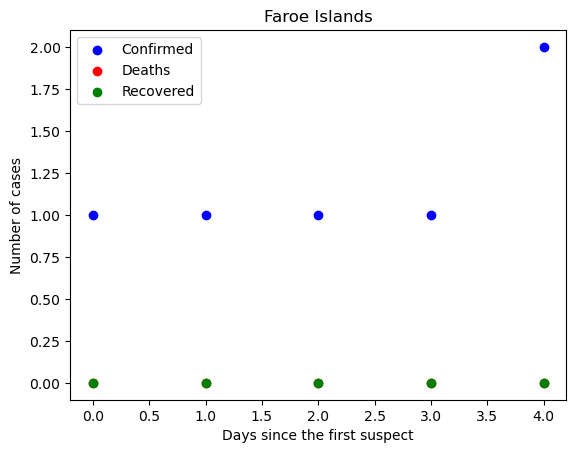

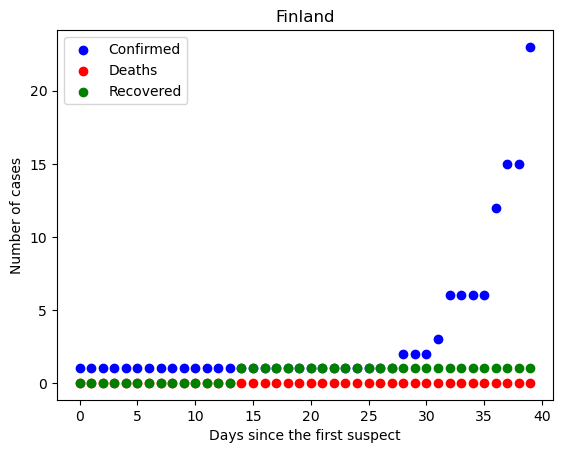

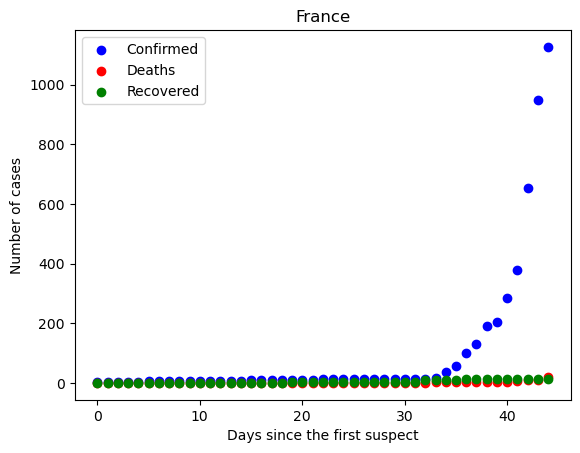

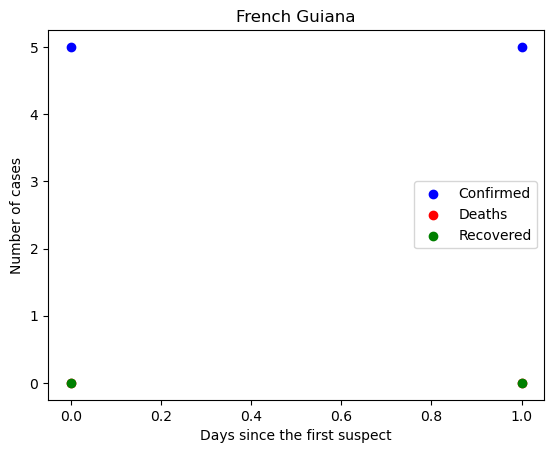

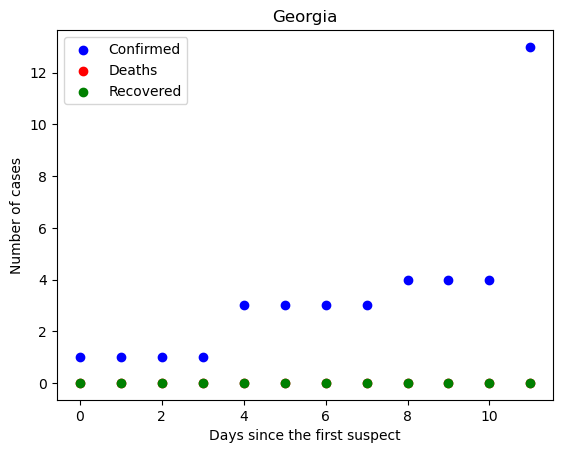

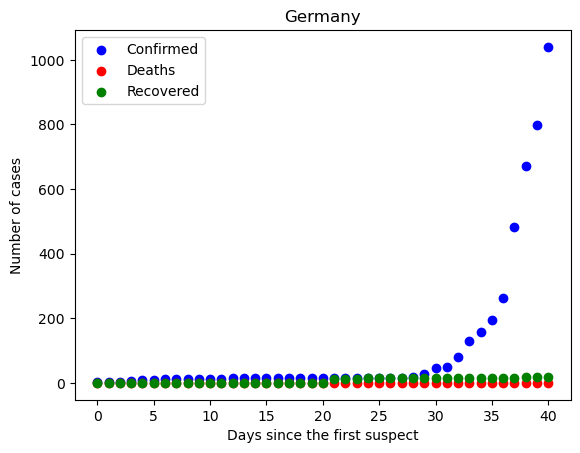

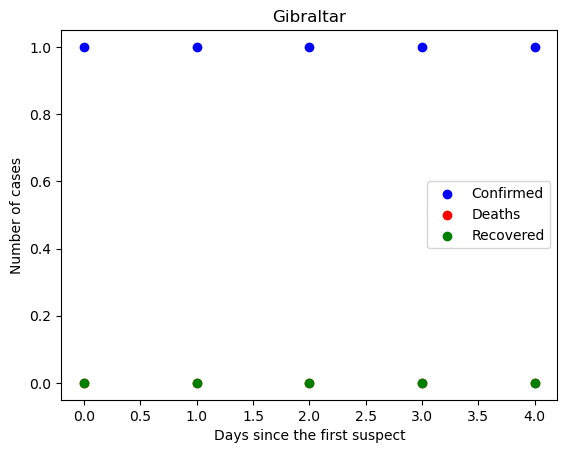

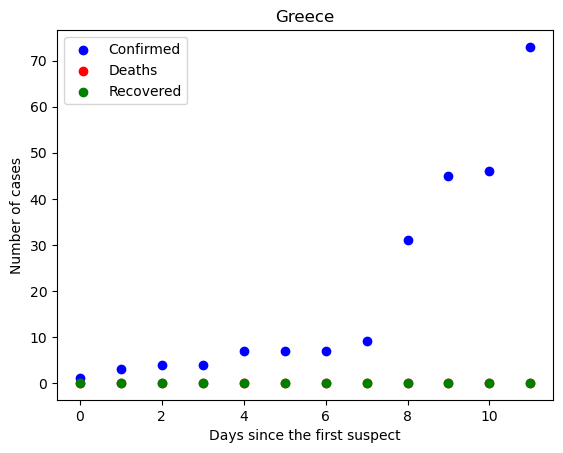

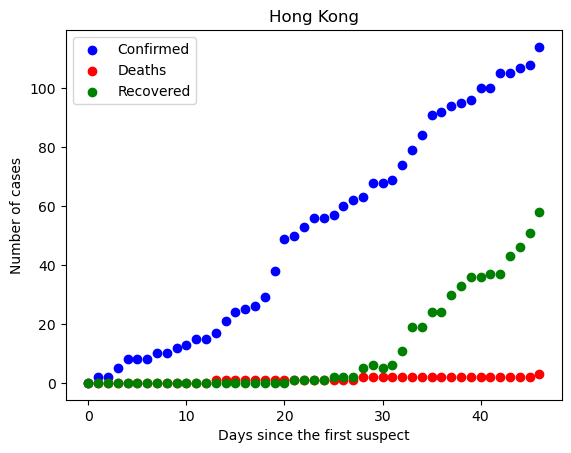

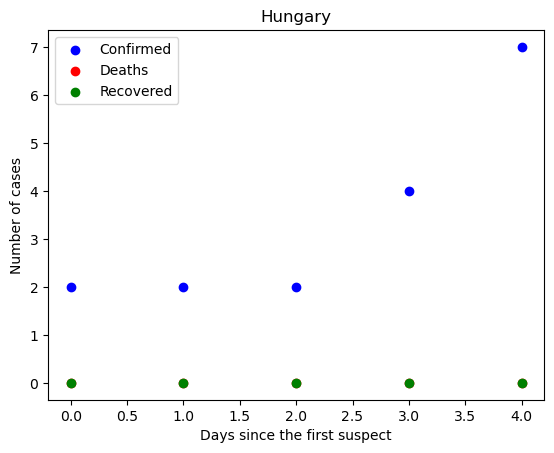

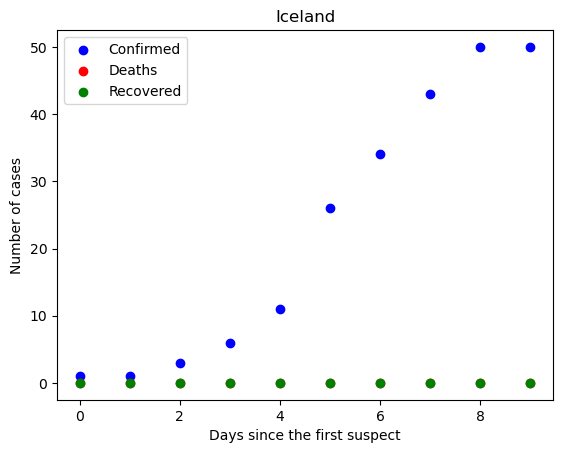

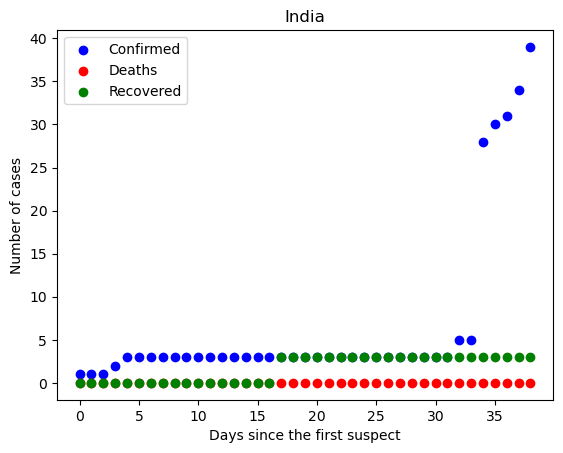

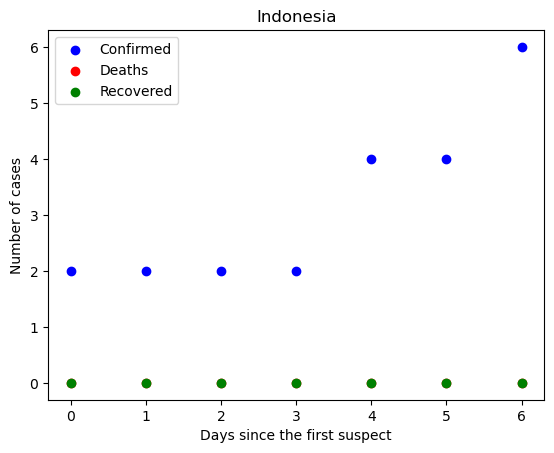

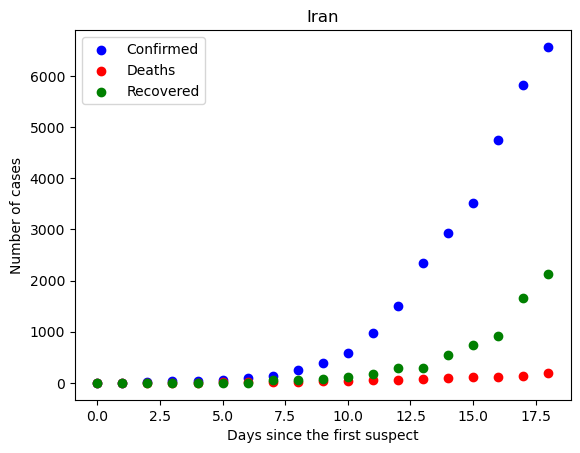

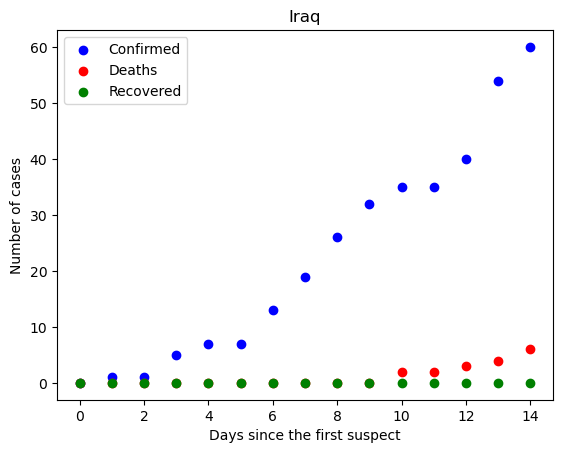

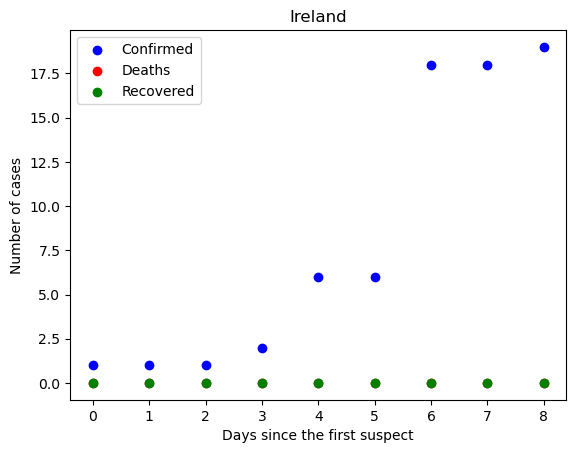

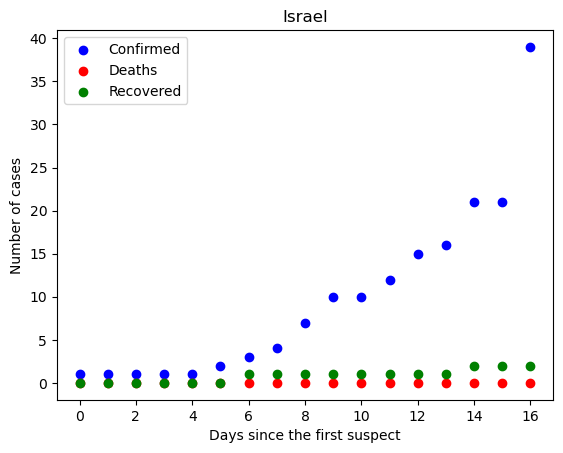

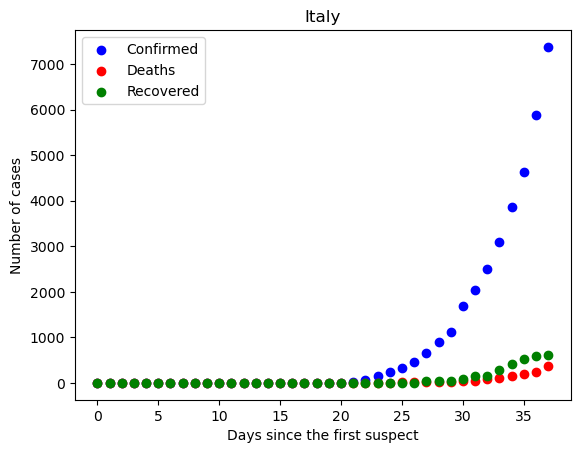

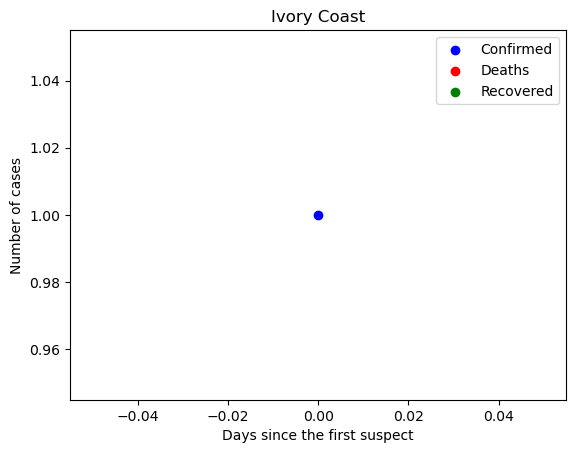

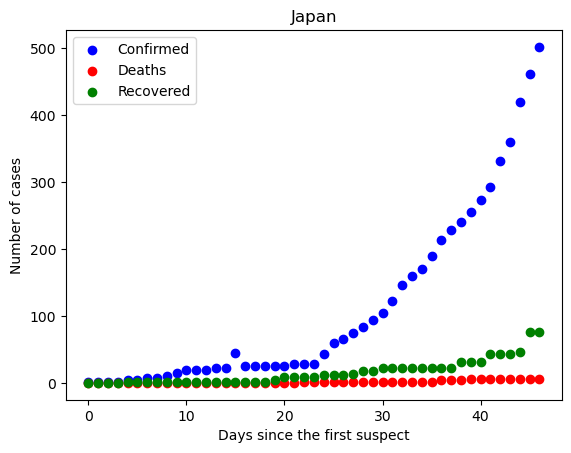

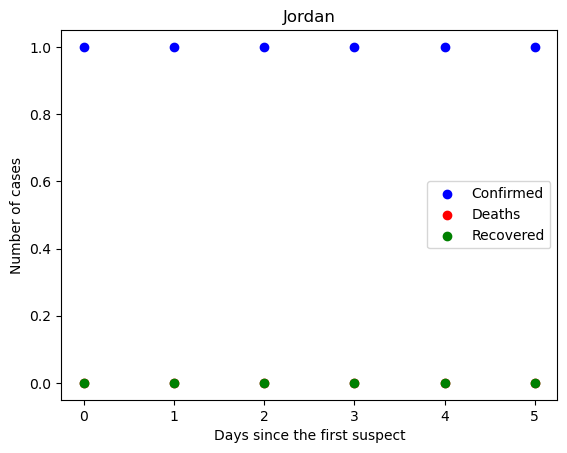

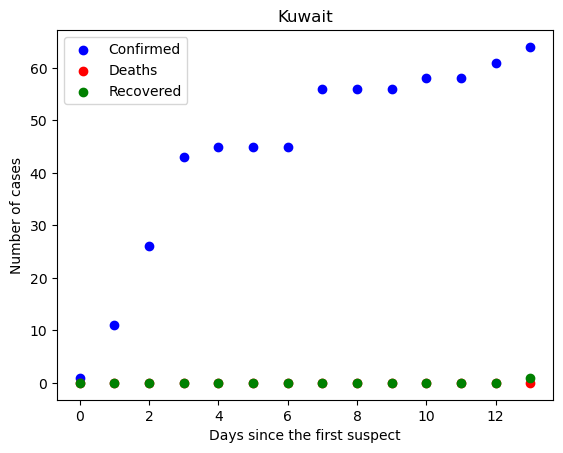

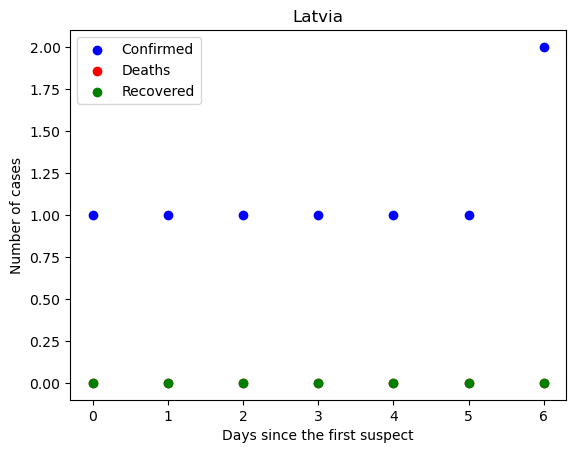

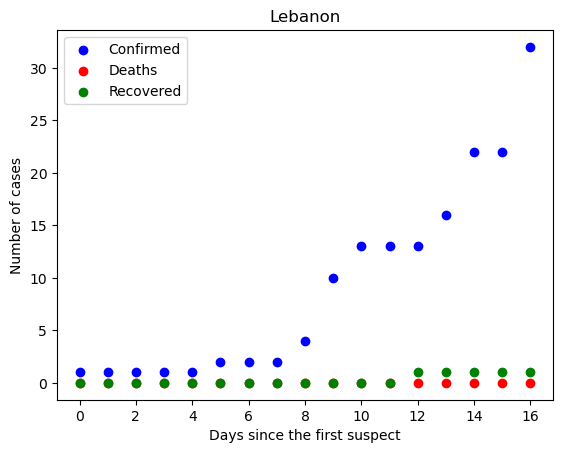

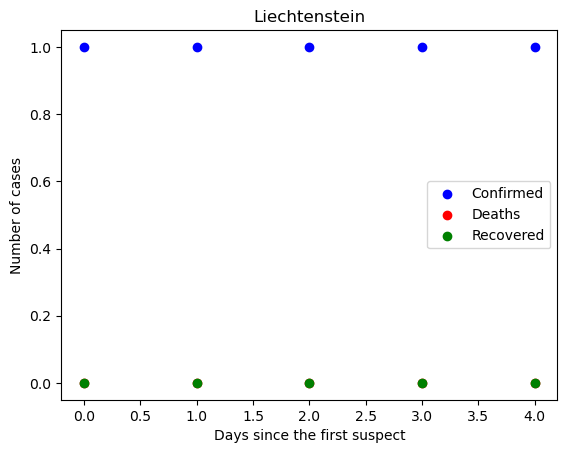

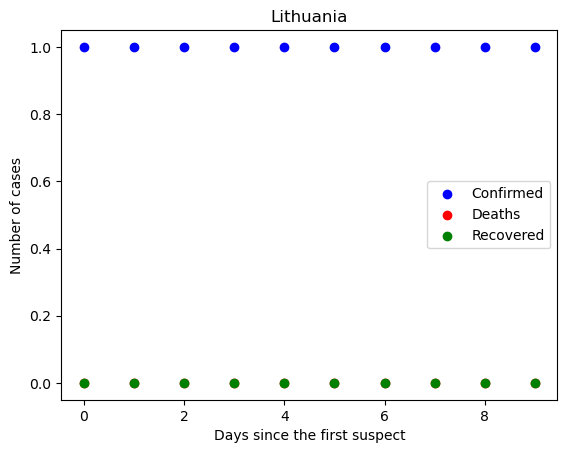

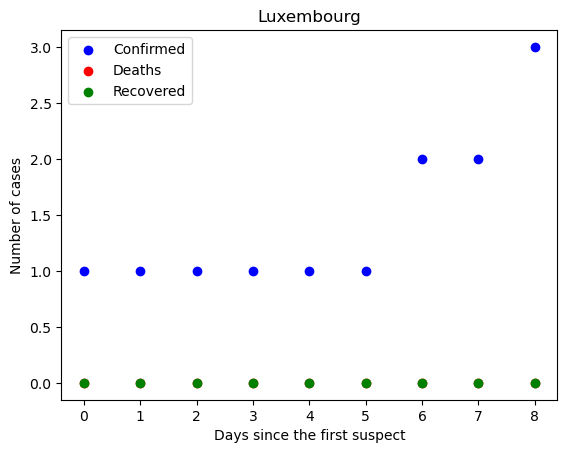

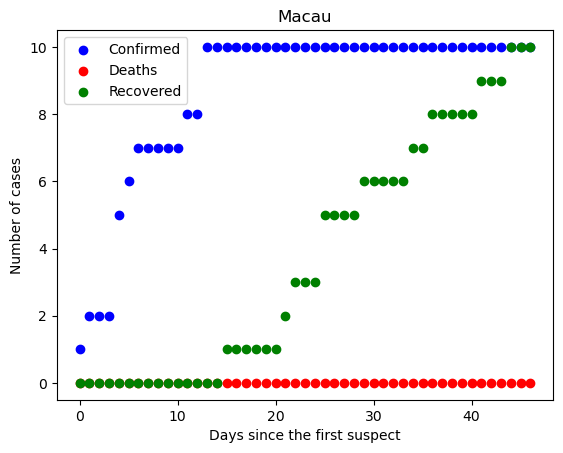

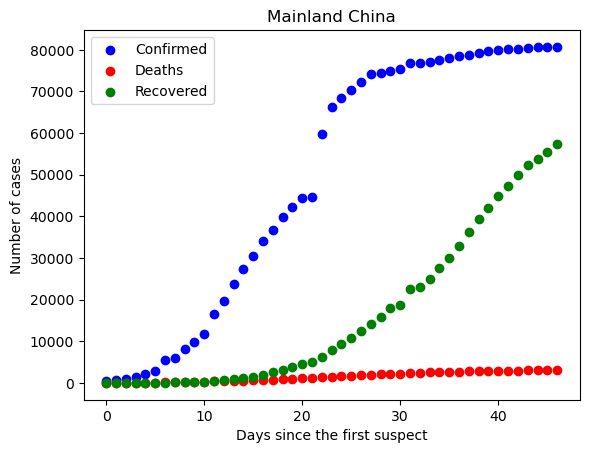

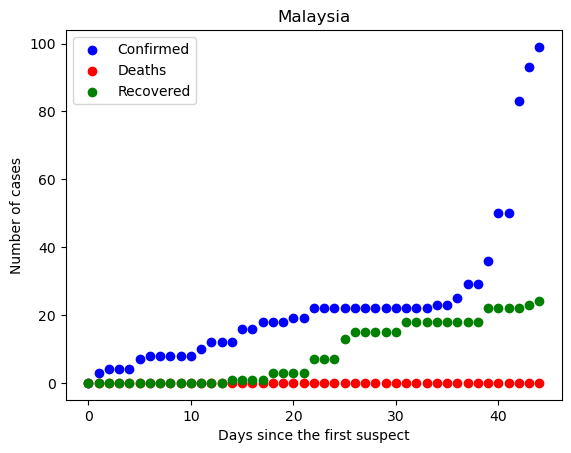

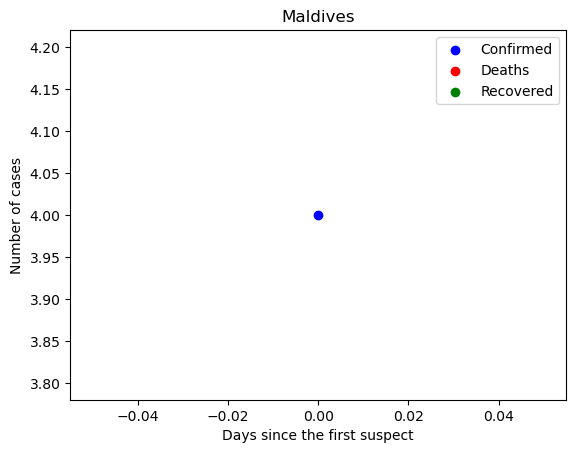

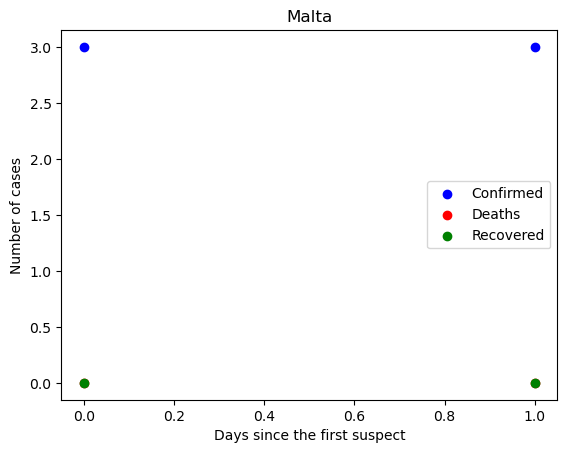

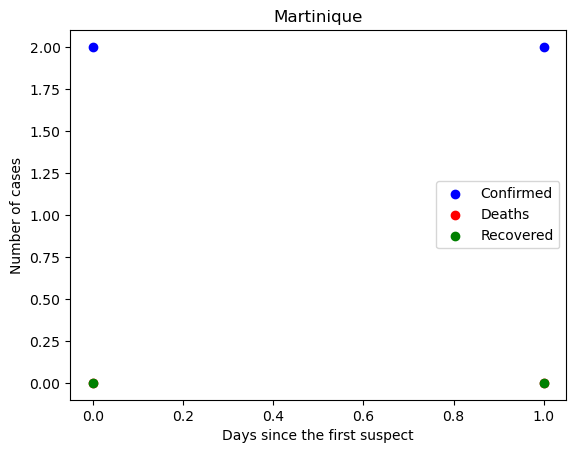

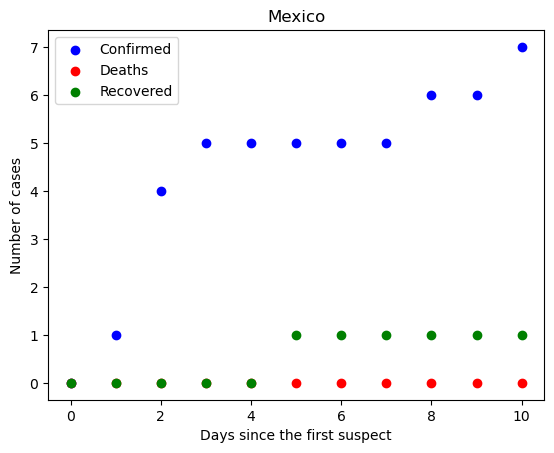

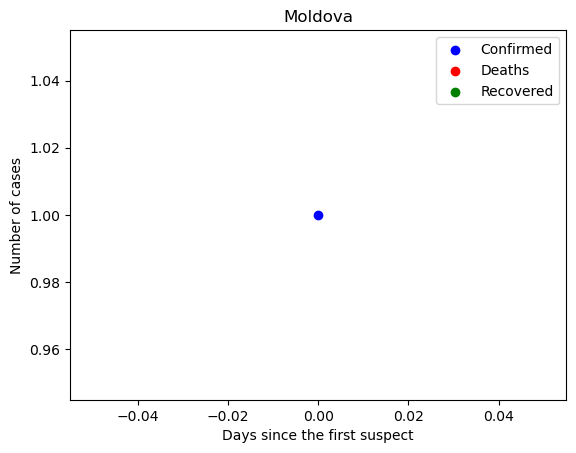

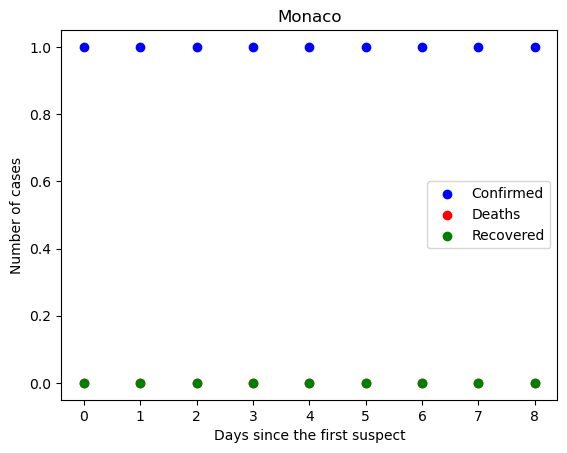

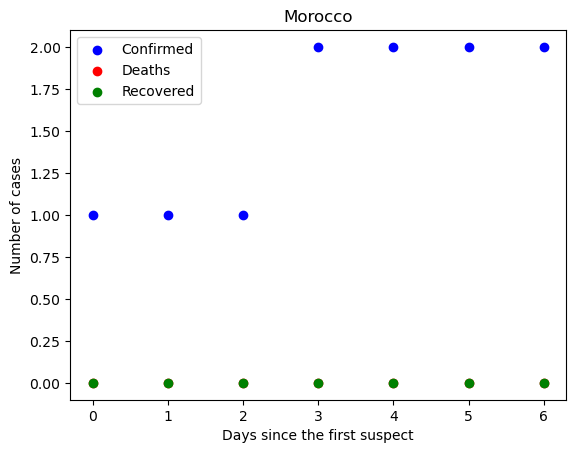

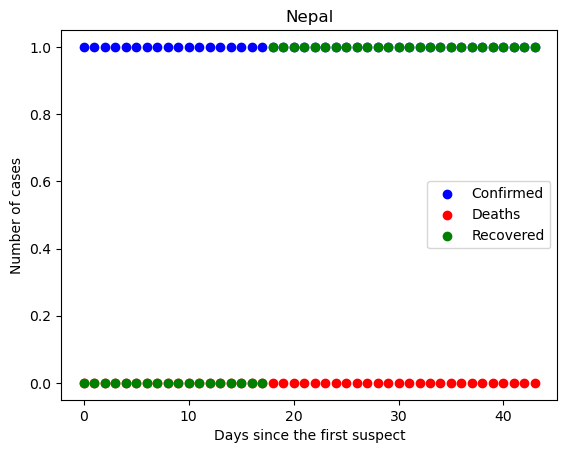

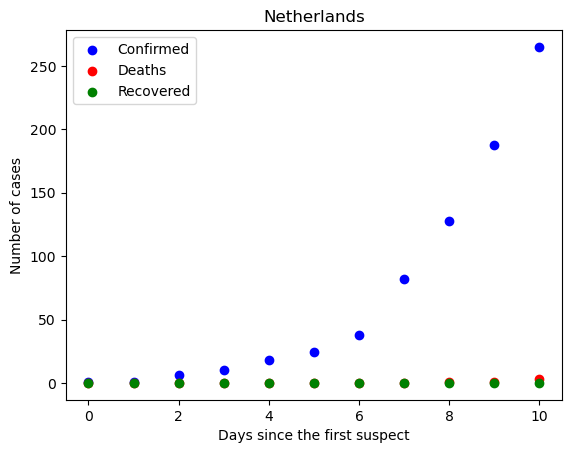

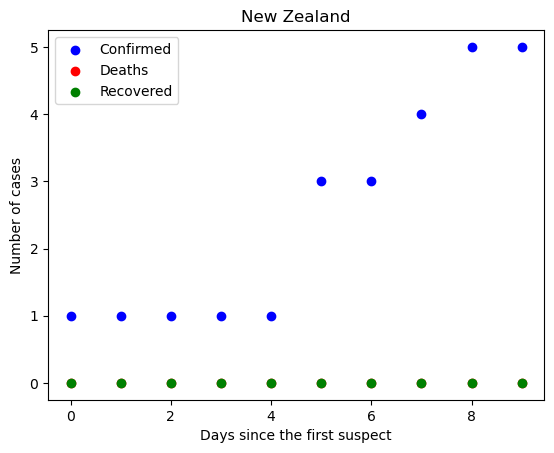

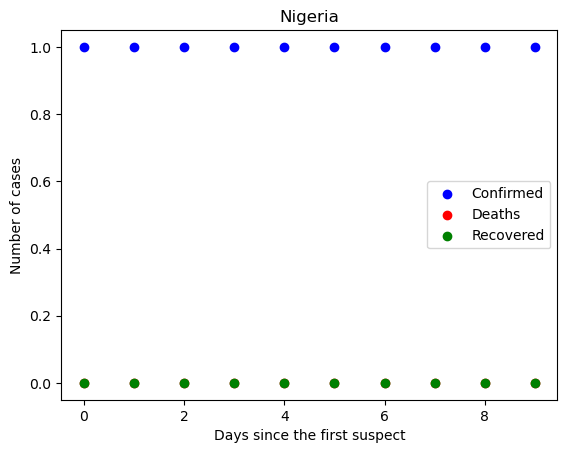

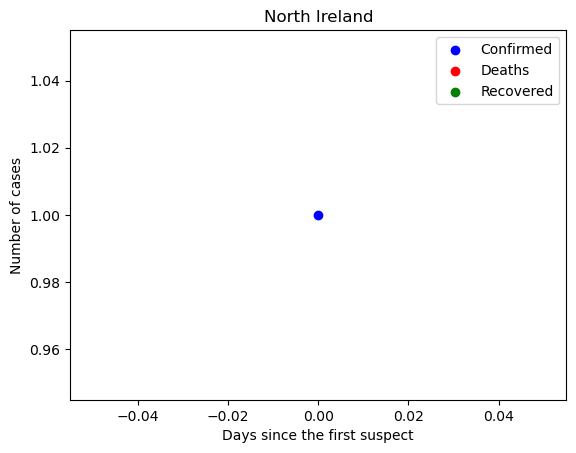

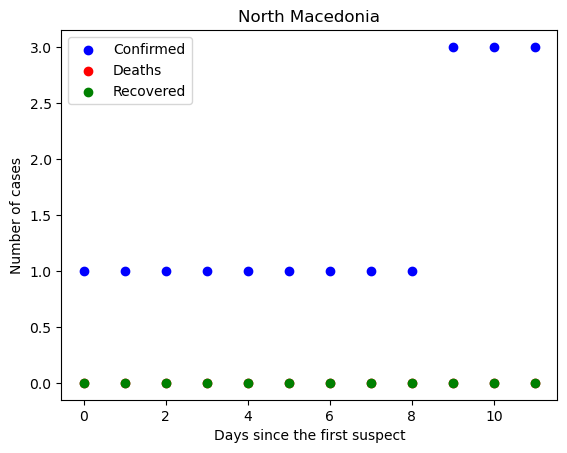

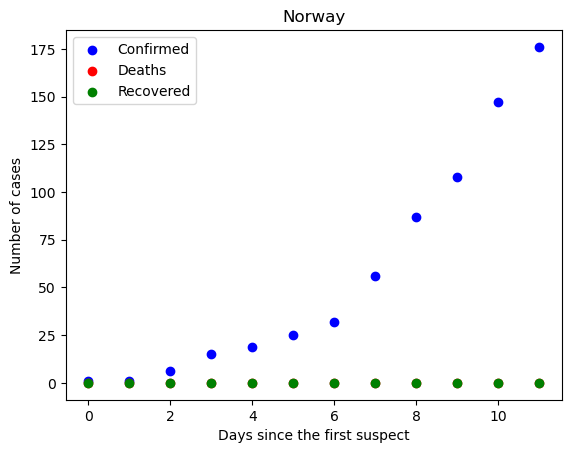

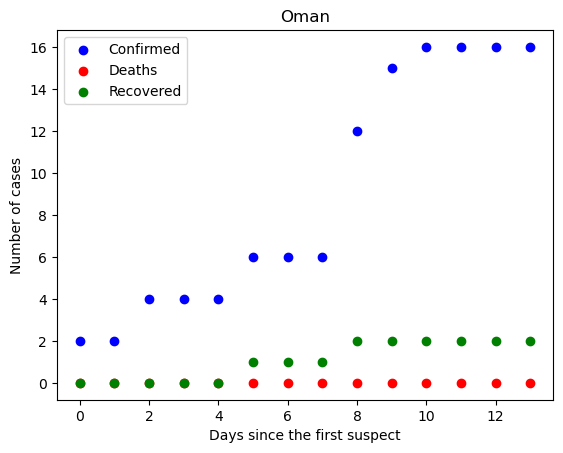

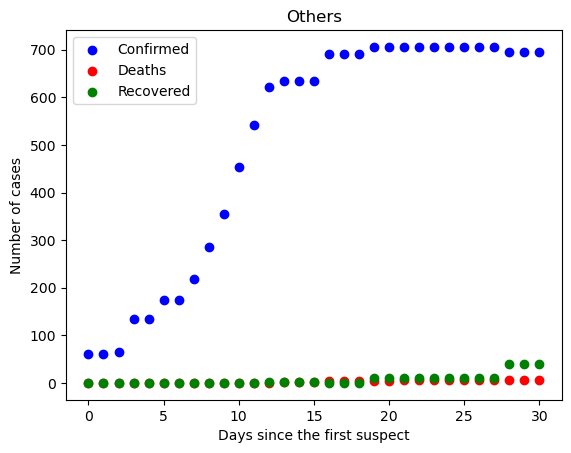

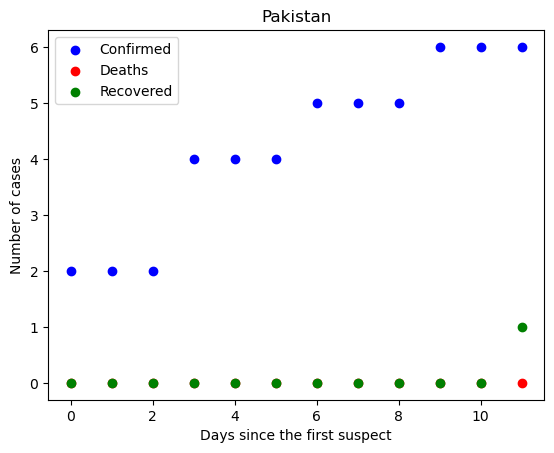

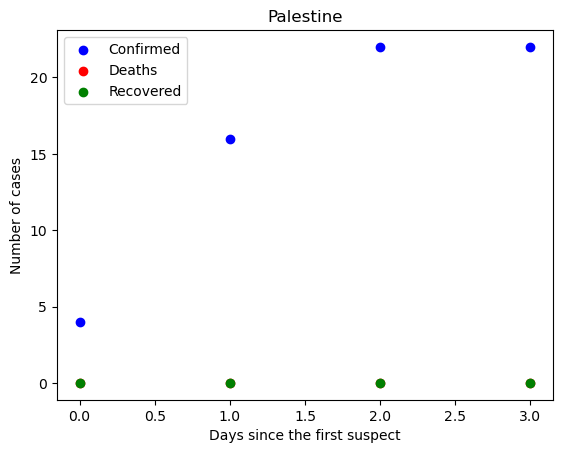

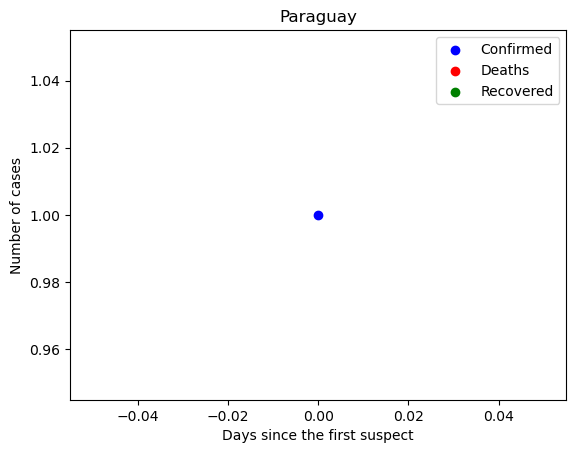

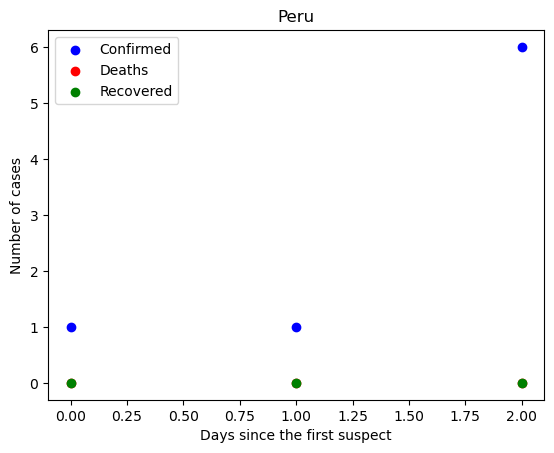

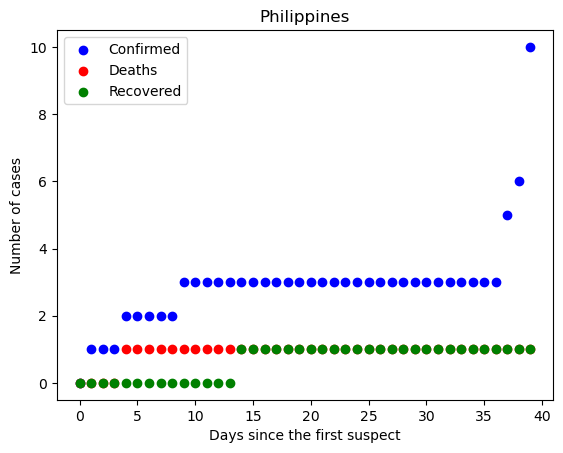

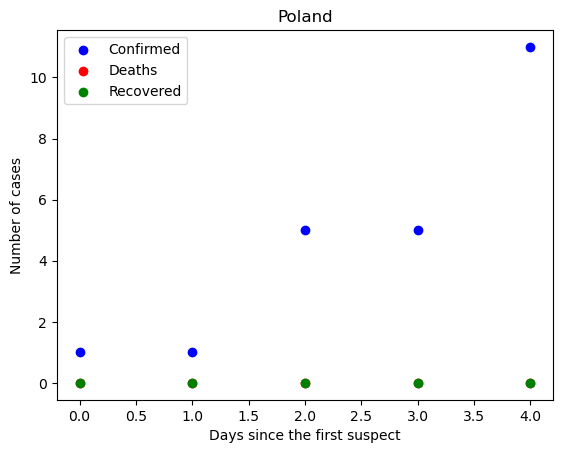

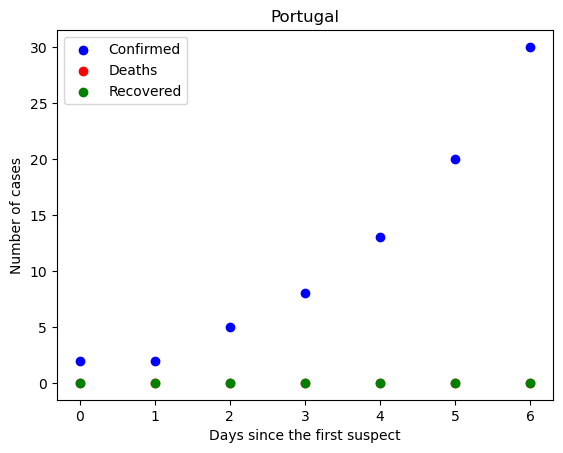

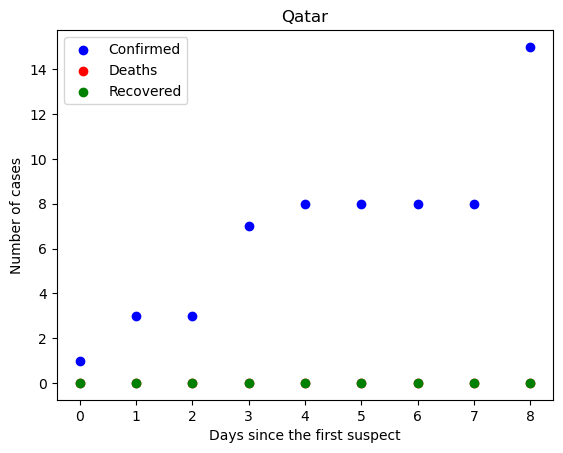

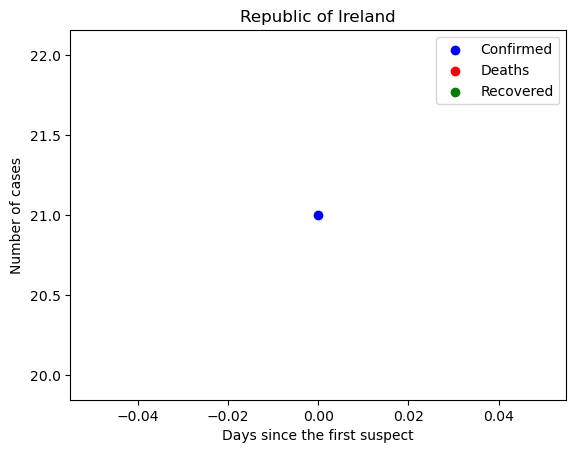

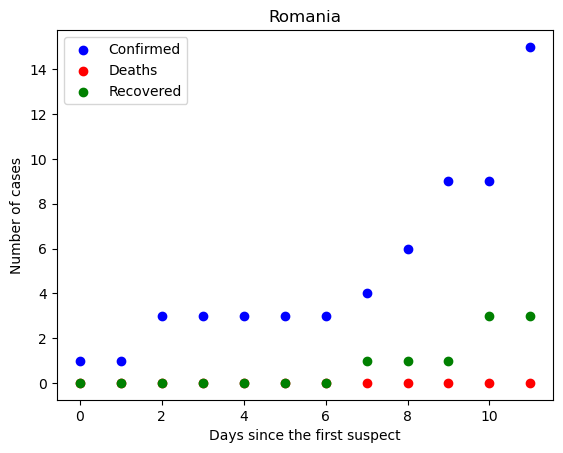

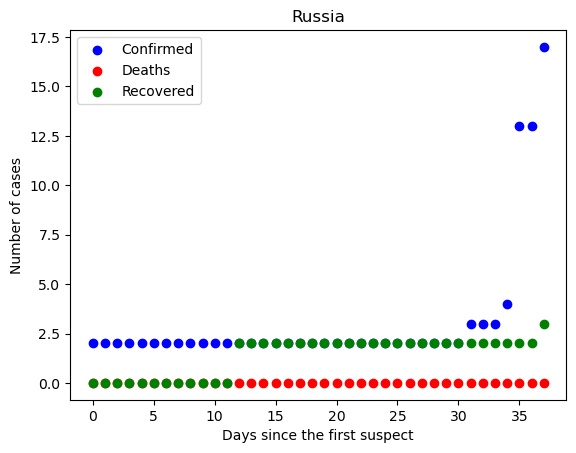

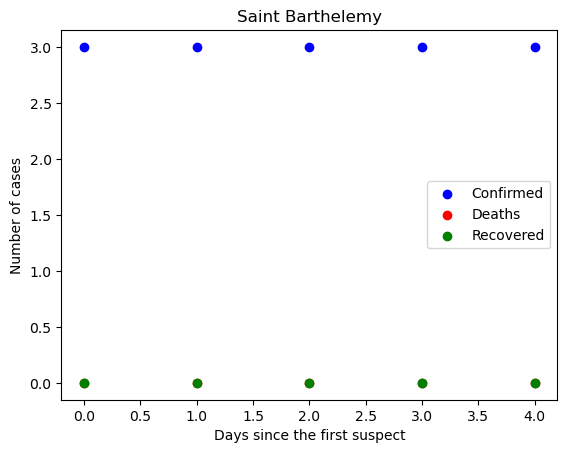

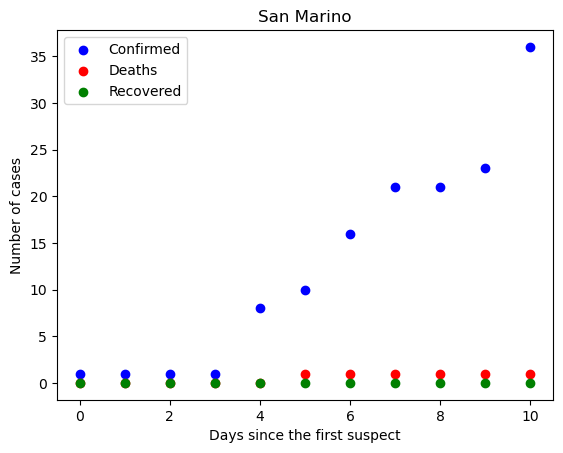

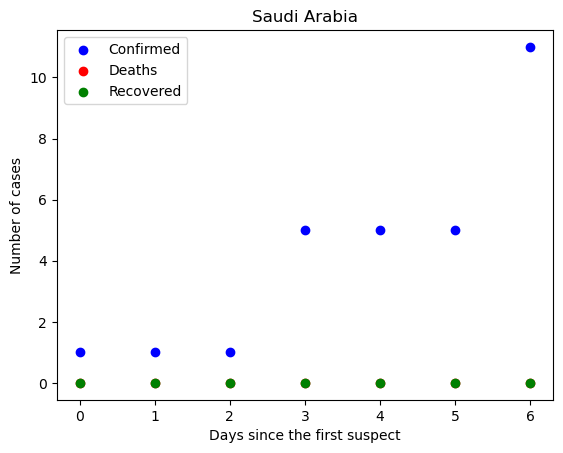

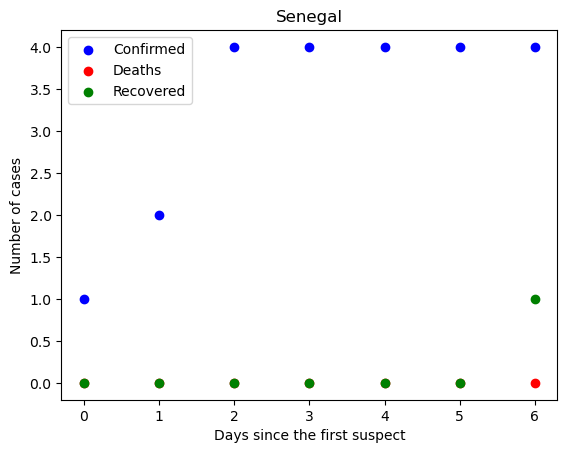

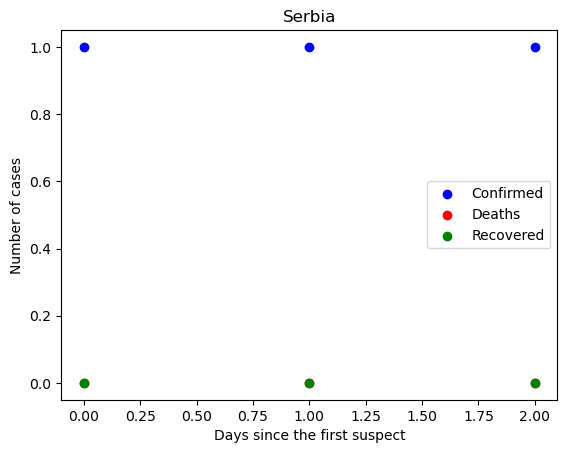

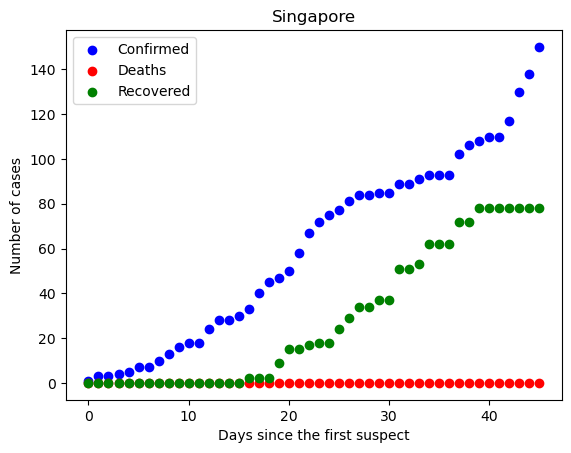

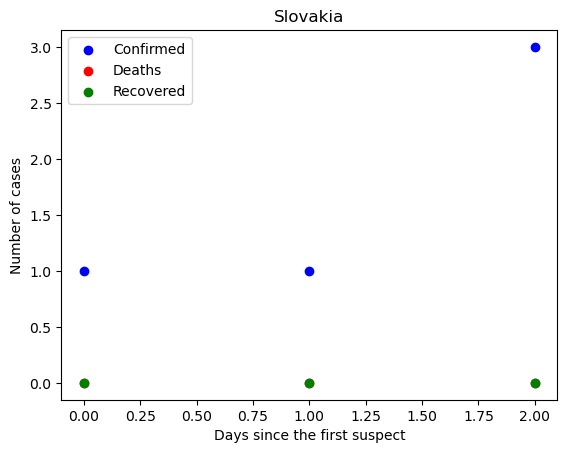

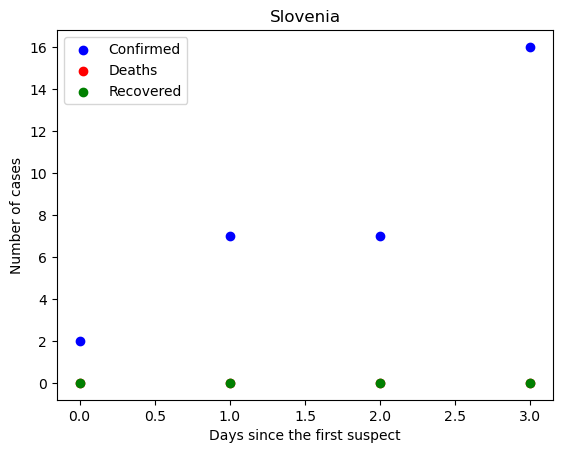

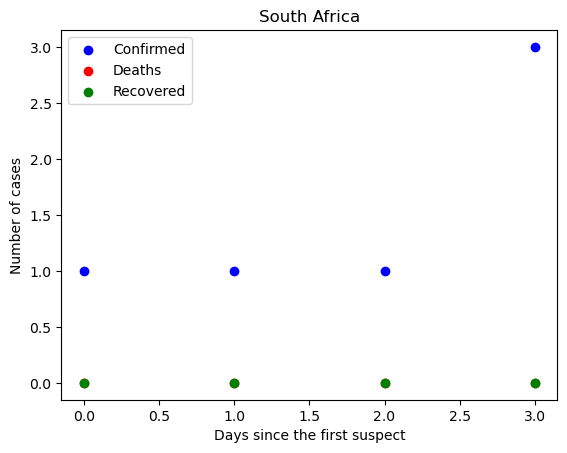

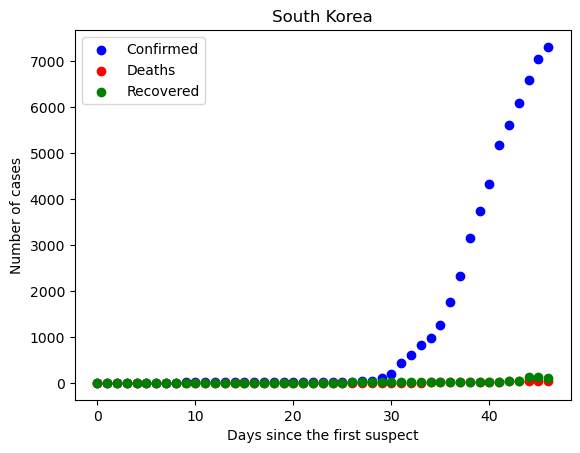

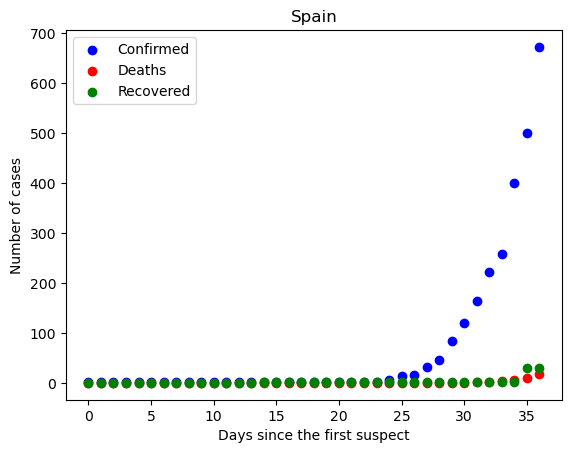

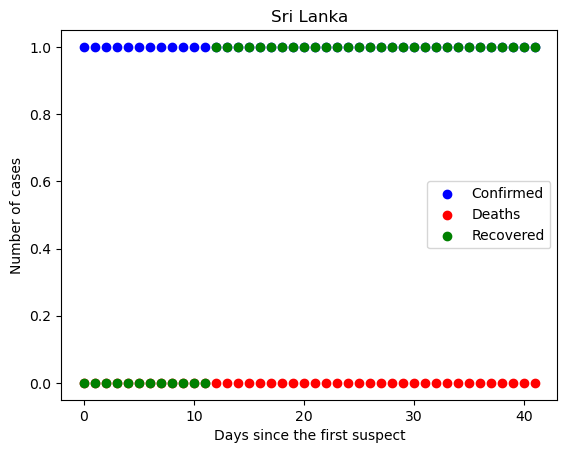

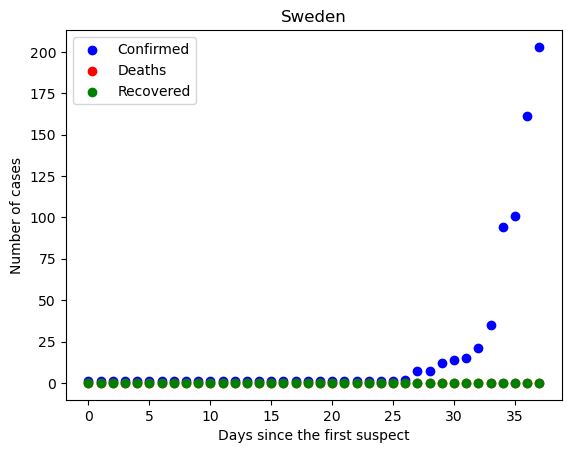

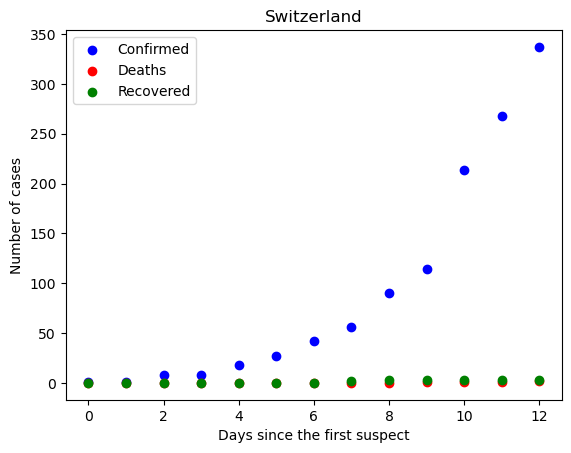

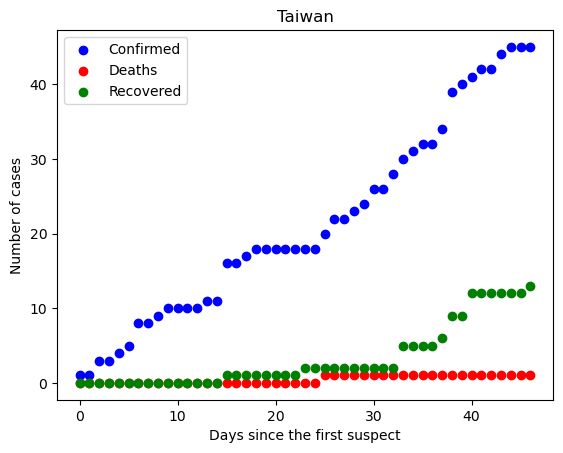

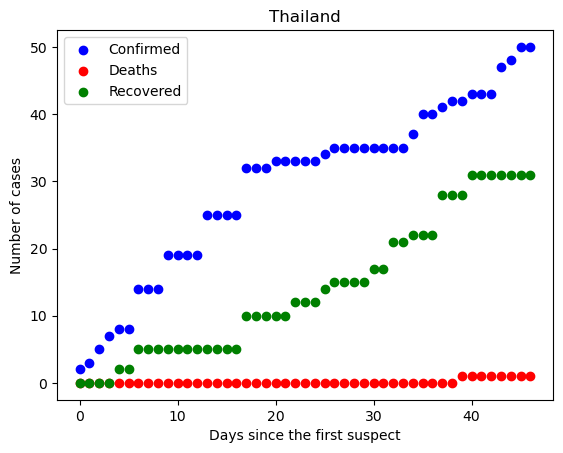

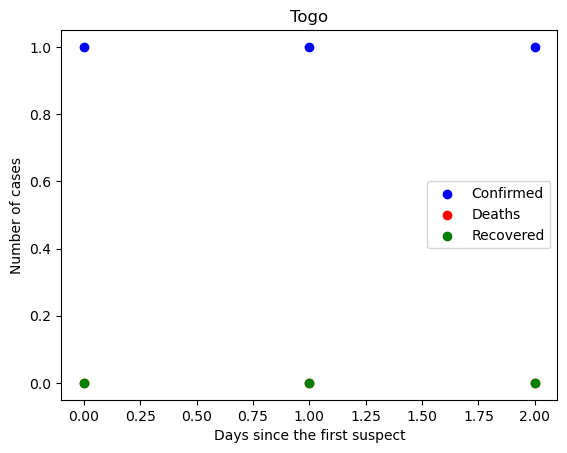

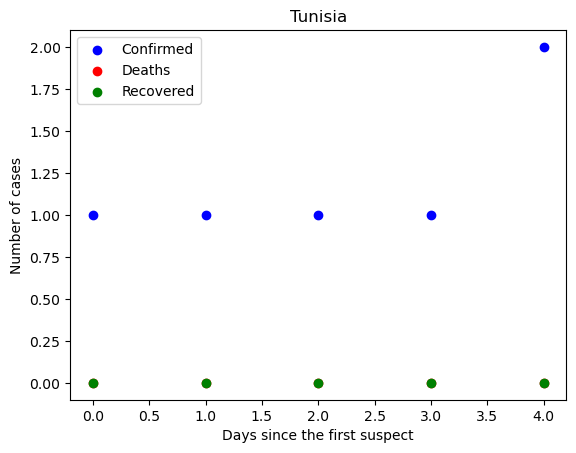

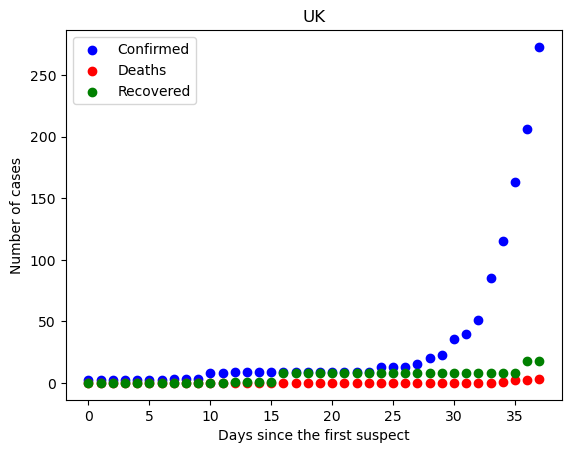

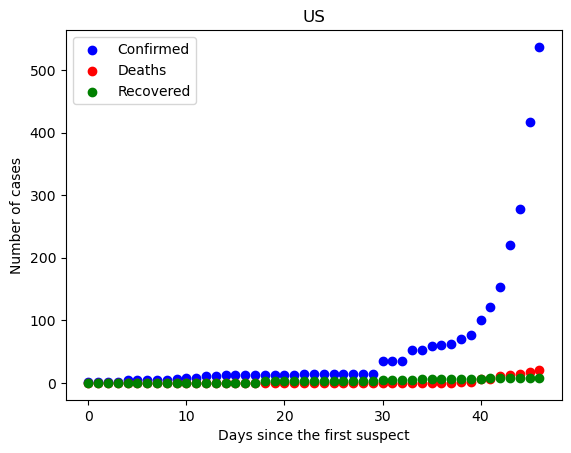

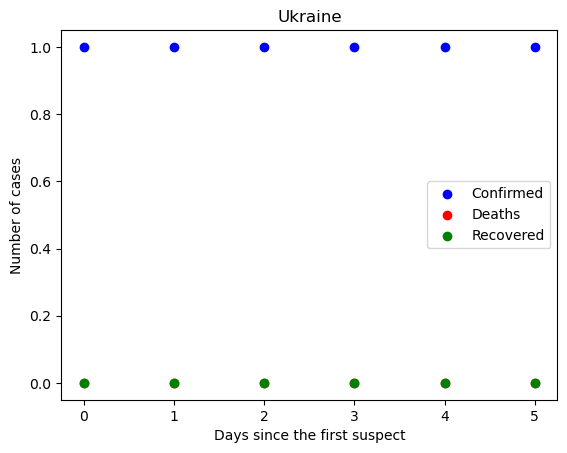

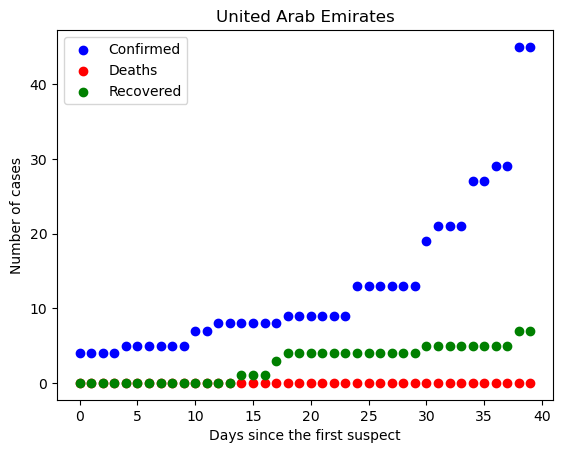

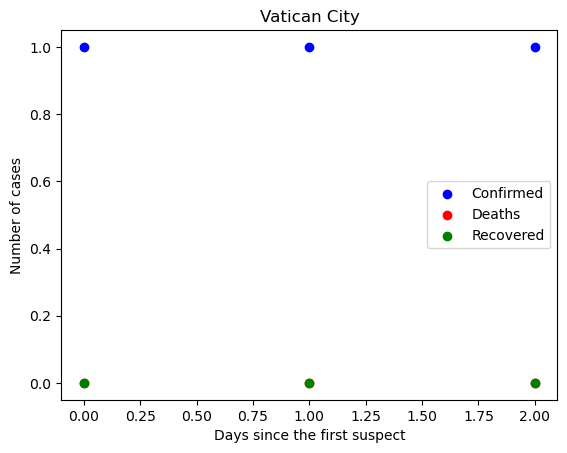

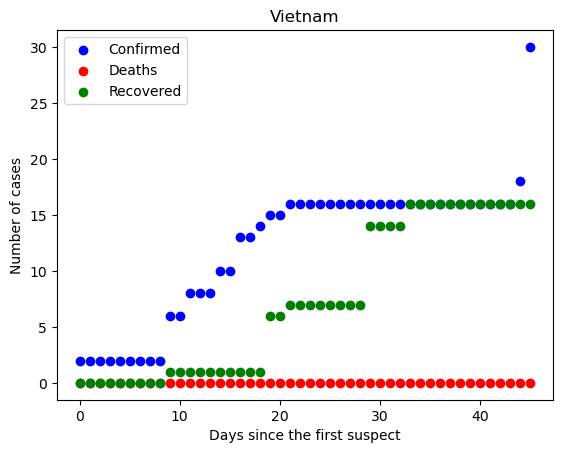

In [53]:
for index in range(0,l):
    country = df3[df3['Country'] == countries[index]].reset_index()
    plt.scatter(np.arange(0,len(country)),country['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(country)),country['Deaths'],color='red',label='Deaths')
    plt.scatter(np.arange(0,len(country)),country['Recovered'],color='green',label='Recovered')
    plt.title(countries[index])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [60]:
df4 = df3.groupby(['Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

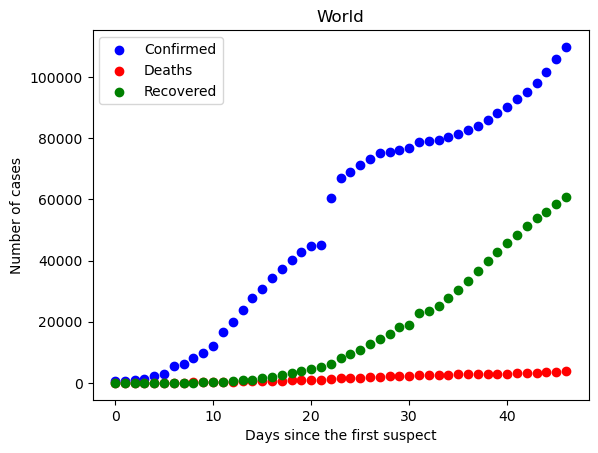

In [61]:
world = df4
plt.scatter(np.arange(0,len(world)),world['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(world)),world['Deaths'],color='red',label='Deaths')
plt.scatter(np.arange(0,len(world)),world['Recovered'],color='green',label='Recovered')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()